In [4]:
import torch
import os
from transformers import AutoTokenizer, AutoModel
from icecream import ic
import time

class DocOwlInfer():
    def __init__(self, ckpt_path):
        self.tokenizer = AutoTokenizer.from_pretrained(ckpt_path, use_fast=False)
        self.model = AutoModel.from_pretrained(ckpt_path, trust_remote_code=True, low_cpu_mem_usage=True, torch_dtype=torch.float16, device_map='auto')
        self.model.init_processor(tokenizer=self.tokenizer, basic_image_size=504, crop_anchors='grid_12')
        
    def inference(self, images, query):
        messages = [{'role': 'USER', 'content': '<|image|>'*len(images)+query}]
        answer = self.model.chat(messages=messages, images=images, tokenizer=self.tokenizer)
        return answer


docowl = DocOwlInfer(ckpt_path='mPLUG/DocOwl2')

images = [
        './image.png'
    ]

answer = docowl.inference(images, query='what is this image about? provide detailed information.')



Some weights of MPLUGDocOwl2 were not initialized from the model checkpoint at mPLUG/DocOwl2 and are newly initialized: ['model.layers.0.self_attn.rotary_emb.inv_freq', 'model.layers.1.self_attn.rotary_emb.inv_freq', 'model.layers.10.self_attn.rotary_emb.inv_freq', 'model.layers.11.self_attn.rotary_emb.inv_freq', 'model.layers.12.self_attn.rotary_emb.inv_freq', 'model.layers.13.self_attn.rotary_emb.inv_freq', 'model.layers.14.self_attn.rotary_emb.inv_freq', 'model.layers.15.self_attn.rotary_emb.inv_freq', 'model.layers.16.self_attn.rotary_emb.inv_freq', 'model.layers.17.self_attn.rotary_emb.inv_freq', 'model.layers.18.self_attn.rotary_emb.inv_freq', 'model.layers.19.self_attn.rotary_emb.inv_freq', 'model.layers.2.self_attn.rotary_emb.inv_freq', 'model.layers.20.self_attn.rotary_emb.inv_freq', 'model.layers.21.self_attn.rotary_emb.inv_freq', 'model.layers.22.self_attn.rotary_emb.inv_freq', 'model.layers.23.self_attn.rotary_emb.inv_freq', 'model.layers.24.self_attn.rotary_emb.inv_freq', 

This image is about a shipping label for a package sent from Seagull Scientific in Baltimore to an address in Bellevue, Washington.
The image contains information about a package, including the sender (Seagull Scientific), recipient (Bellevue, WA 98007), and contents (6 pallets). It also includes details about the carrier (UPS Bill of Lading # 0001258108) and the shipping label number (6I1SVOEX). The package was sent on an unspecified date and the number of pallets used for shipping is mentioned.


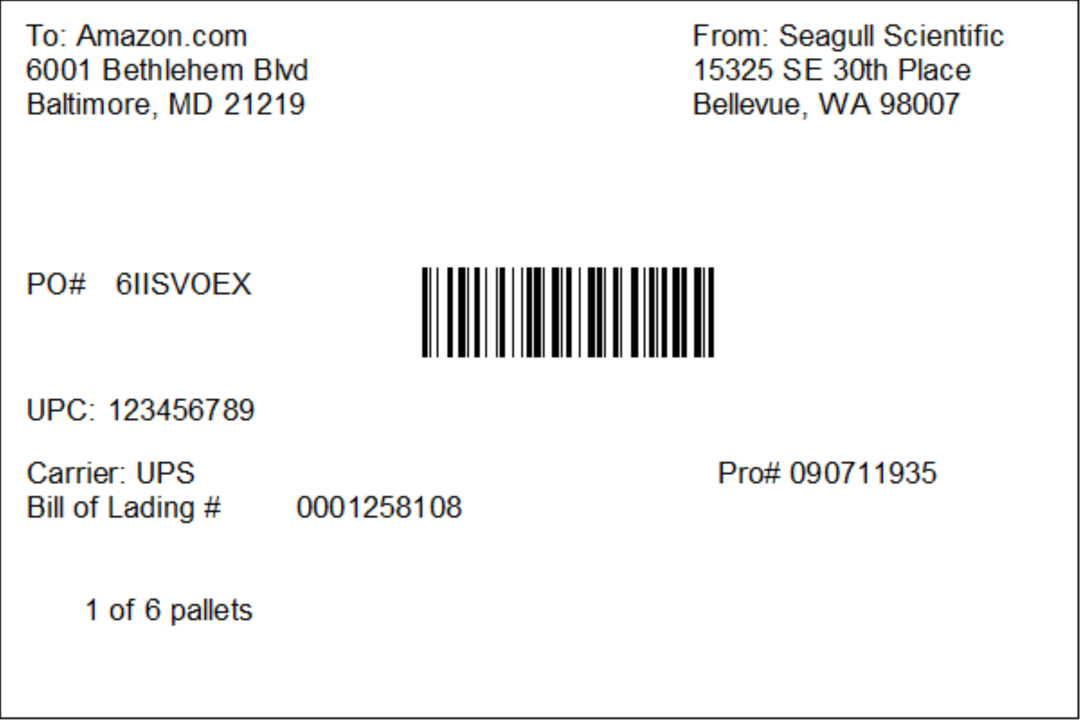

In [5]:
image = Image.open(images[0])
image

In [6]:
import time
start_time = time.time()
docowl.inference(images, query='Give me the pallet information in json format.')
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")


ic| prompt: ('USER: <img 1><|image|>Give me the pallet information in json format. '
             'ASSISTANT:')


{'pallets': 6, 'loding': '0001258108', 'carrier': 'UPS', 'pro': '090711935', 'UPC': '123456789', 'PO': '6I1SVOEX', 'Bellevue', 'WA': '98007', 'Seagull Scientific 6001 Bethlehem Blvd', 'Baltimore', 'MD': '21219'}]
Time taken: 3.875173330307007 seconds
